Step 1 : Data Cleaning

You have collected your data! So it's time to do a cleaning on it. A cleaned dataset is a dataset that doesn't contain any duplicates, is blank spaces or error-free. The rest of the analysis can be discarded if you neglect this step!

    No duplicates
    No blank spaces (ex: " I love python " => "I love python")
    No errors
    No empty values

In [1]:
%config IPCompleter.greedy=True

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
data = '/Users/Andy/Documents/_BeCode/Data-Analysis/DatasetsImmo/Andy/Andy_CM_immoweb_data.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head(10)

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,primaryEnergyConsumptionLevel,room_number,surface,atticExists,basementExists,hasSwimmingPool,indoor,outdoor,short_id,company_name,m2,commune
0,9042129,apartment group,apartment group,336000 - 610000,for sale,1000,xl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2575488,we invest real estate,94,Bruxelles
1,9041098,apartment group,apartment group,165000 - 420000,for sale,6001,xl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400721,concept confort sprl,64,Marcinelle
2,9039019,apartment,apartment,1550000,for sale,1050,xl,usa hyper equipped,2017.0,as new,gas,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,2595964,lecobel vaneau vente neuf,213,Ixelles
3,9043036,apartment,apartment,195000,for sale,9600,xl,installed,2014.0,good,gas,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1002634,immo beguin,75,Renaix
4,9042073,apartment,apartment,320000,for sale,1070,xl,usa hyper equipped,2017.0,as new,gas,NaN,3.0,NaN,NaN,True,NaN,1.0,1.0,2916018,sky realty,130,Anderlecht
5,9034494,apartment,apartment,715000,for sale,1950,xl,usa hyper equipped,2020.0,as new,gas,NaN,2.0,NaN,NaN,True,NaN,1.0,1.0,2352,latour et petit vente,126,Kraainem
6,9042950,apartment,triplex,235000,for sale,6010,xl,hyper equipped,2013.0,as new,gas,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,663882,etimo,149,Couillet
7,8997289,apartment,flat studio,224500,for sale,1180,xl,hyper equipped,1950.0,good,gas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1731013,orientations,52,Uccle
8,9042175,apartment group,apartment group,127000 - 166000,for sale,1160,xl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2575488,we invest real estate,19,Auderghem
9,9039433,apartment,apartment,780000,for sale,1180,xl,usa hyper equipped,1962.0,just renovated,gas,NaN,3.0,NaN,NaN,True,NaN,1.0,1.0,1942392,bathim &amp; co,190,Uccle


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19855 entries, 0 to 19854
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             19855 non-null  int64  
 1   type                           19855 non-null  object 
 2   subtype                        19855 non-null  object 
 3   price                          19855 non-null  object 
 4   transactionType                19855 non-null  object 
 5   zip                            19855 non-null  int64  
 6   visualisationOption            19855 non-null  object 
 7   cuisine_type                   12904 non-null  object 
 8   constructionYear               11227 non-null  float64
 9   condition                      13434 non-null  object 
 10  heatingType                    12404 non-null  object 
 11  primaryEnergyConsumptionLevel  0 non-null      float64
 12  room_number                    18184 non-null 

In [6]:
# No duplicates
df.duplicated().any()

False

In [7]:
# No blank spaces
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19855 entries, 0 to 19854
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             19855 non-null  int64  
 1   type                           19855 non-null  object 
 2   subtype                        19855 non-null  object 
 3   price                          19855 non-null  object 
 4   transactionType                19855 non-null  object 
 5   zip                            19855 non-null  int64  
 6   visualisationOption            19855 non-null  object 
 7   cuisine_type                   12904 non-null  object 
 8   constructionYear               11227 non-null  float64
 9   condition                      13434 non-null  object 
 10  heatingType                    12404 non-null  object 
 11  primaryEnergyConsumptionLevel  0 non-null      float64
 12  room_number                    18184 non-null 

In [8]:
# No errors


In [9]:
# No empty values in dataframe
df.isna()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,primaryEnergyConsumptionLevel,room_number,surface,atticExists,basementExists,hasSwimmingPool,indoor,outdoor,short_id,company_name,m2,commune
0,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,False,False,False,False
19851,False,False,False,False,False,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,False,False,False
19852,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,False,False,False,False
19853,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,False,False,False


In [10]:
# No missing values across each column
df.isna().any()

id                               False
type                             False
subtype                          False
price                            False
transactionType                  False
zip                              False
visualisationOption              False
cuisine_type                      True
constructionYear                  True
condition                         True
heatingType                       True
primaryEnergyConsumptionLevel     True
room_number                       True
surface                           True
atticExists                       True
basementExists                    True
hasSwimmingPool                   True
indoor                            True
outdoor                           True
short_id                         False
company_name                      True
m2                               False
commune                          False
dtype: bool

In [11]:
# count of missing values across columns
df.isna().sum()

id                                   0
type                                 0
subtype                              0
price                                0
transactionType                      0
zip                                  0
visualisationOption                  0
cuisine_type                      6951
constructionYear                  8628
condition                         6421
heatingType                       7451
primaryEnergyConsumptionLevel    19855
room_number                       1671
surface                          16505
atticExists                      17230
basementExists                   12258
hasSwimmingPool                  19327
indoor                           12814
outdoor                          14337
short_id                             0
company_name                      1117
m2                                   0
commune                              0
dtype: int64

In [12]:
# convert constructionYear: 'float' to 'date'
df.constructionYear = pd.to_datetime(df.constructionYear, format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19855 entries, 0 to 19854
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             19855 non-null  int64         
 1   type                           19855 non-null  object        
 2   subtype                        19855 non-null  object        
 3   price                          19855 non-null  object        
 4   transactionType                19855 non-null  object        
 5   zip                            19855 non-null  int64         
 6   visualisationOption            19855 non-null  object        
 7   cuisine_type                   12904 non-null  object        
 8   constructionYear               11227 non-null  datetime64[ns]
 9   condition                      13434 non-null  object        
 10  heatingType                    12404 non-null  object        
 11  primaryEnergyCo

In [13]:
df.tail()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,primaryEnergyConsumptionLevel,room_number,surface,atticExists,basementExists,hasSwimmingPool,indoor,outdoor,short_id,company_name,m2,commune
19850,8128634,house,house,435200,for sale,2550,xl,hyper equipped,2019-01-01,as new,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3309404,immo vertommen,140,Kontich%20Waarloos
19851,8907618,house,house,420000,for sale,5640,xl,NaN,NaT,NaN,fueloil,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1786112,century 21 beaux villages,1000,Mettet
19852,8954484,house,mansion,450000,for sale,2018,xl,NaN,NaT,NaN,NaN,NaN,6.0,NaN,NaN,True,NaN,NaN,NaN,2239033,era stadsgoed,253,Anvers
19853,9001418,house,apartment block,450000,for sale,9500,xl,installed,NaT,to be done up,gas,NaN,5.0,NaN,NaN,NaN,NaN,1.0,NaN,227493,groep bg,5,Grammont
19854,8907992,house,house,420000,for sale,5621,xl,NaN,NaT,NaN,fueloil,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1786112,century 21 beaux villages,1000,Morialm%C3%A9


In [14]:
# Summarize all the columns
df.describe()

,id,zip,primaryEnergyConsumptionLevel,room_number,surface,indoor,outdoor,short_id,m2
count,1.985500e+04,19855.000000,0.0,18184.000000,3350.000000,7041.000000,5518.000000,1.985500e+04,19855.000000
mean,8.813947e+06,5351.076958,NaN,2.993731,1115.731940,7.673626,4.169264,1.723057e+06,152.286678
std,3.474169e+05,3203.867180,NaN,3.426793,4881.913707,417.228670,10.313800,1.207467e+06,168.879982
min,3.702839e+06,1000.000000,NaN,0.000000,1.000000,1.000000,1.000000,1.410000e+03,1.000000
25%,8.783413e+06,1970.000000,NaN,2.000000,76.000000,1.000000,1.000000,5.011240e+05,79.000000
50%,8.933765e+06,5330.000000,NaN,3.000000,210.000000,1.000000,2.000000,1.838339e+06,118.000000
75%,9.000254e+06,8470.000000,NaN,4.000000,700.000000,2.000000,4.000000,2.735512e+06,188.000000
max,9.043940e+06,9992.000000,NaN,204.000000,80978.000000,35000.000000,250.000000,3.675574e+06,8800.000000


In [15]:
# dataset index
df.index

RangeIndex(start=0, stop=19855, step=1)

In [16]:
# frequency type primaryEnergyConsumptionLevel
print(df.primaryEnergyConsumptionLevel.value_counts().count())
df.primaryEnergyConsumptionLevel.value_counts(normalize =True)*100

0


Series([], Name: primaryEnergyConsumptionLevel, dtype: float64)

In [17]:
# frequency visualisationOption
print(df.visualisationOption.value_counts().count())
df.visualisationOption.value_counts(normalize =True)*100

1


xl    100.0
Name: visualisationOption, dtype: float64

In [18]:
# frequency transactionType
print(df.transactionType.value_counts().count())
df.transactionType.value_counts(normalize =True)*100

1


for sale    100.0
Name: transactionType, dtype: float64

In [19]:
# rename columns 'indoor' and 'outdoor'
df.rename({'indoor': 'indoorParking', 'outdoor':'outdoorParking'}, axis='columns',  inplace = True)

# convert values of columns 'room_number', 'indoorParking' and outdoorParking' from float to int
# df.room_number = df.room_number.astype(int)
# df.indoorParking = df.indoorParking.astype(int)
# df.outdoorParking = df.outdoorParking.astype(int)

In [20]:
# delete column 'primaryEnergyConsumptionLevel' -> no data
del df['primaryEnergyConsumptionLevel']

# delete column 'visualisationOption' -> data not relevant
del df['visualisationOption']

# delete column 'id'-> data not relevant
del df['id']

# delete column 'id' and 'short_id'-> data not relevant
del df['short_id']

# delete column 'transactionType' -> all values == for sale
del df['transactionType']

# delete column 'surface' -> data not relevant cf. column m2
del df['surface']

In [21]:
df.head(5)

,type,subtype,price,zip,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,indoorParking,outdoorParking,company_name,m2,commune
0,apartment group,apartment group,336000 - 610000,1000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,we invest real estate,94,Bruxelles
1,apartment group,apartment group,165000 - 420000,6001,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,concept confort sprl,64,Marcinelle
2,apartment,apartment,1550000,1050,usa hyper equipped,2017-01-01,as new,gas,3.0,NaN,NaN,NaN,NaN,1.0,lecobel vaneau vente neuf,213,Ixelles
3,apartment,apartment,195000,9600,installed,2014-01-01,good,gas,2.0,NaN,NaN,NaN,NaN,NaN,immo beguin,75,Renaix
4,apartment,apartment,320000,1070,usa hyper equipped,2017-01-01,as new,gas,3.0,NaN,True,NaN,1.0,1.0,sky realty,130,Anderlecht


In [22]:
# frequency type
print (df.type.value_counts())
df.type.value_counts(normalize =True)*100

house              9568
apartment          8616
apartment group    1318
house group         353
Name: type, dtype: int64


house              48.189373
apartment          43.394611
apartment group     6.638126
house group         1.777890
Name: type, dtype: float64

In [23]:
df.loc[df['type'].isin(['apartment group','house group'])].head()

,type,subtype,price,zip,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,indoorParking,outdoorParking,company_name,m2,commune
0,apartment group,apartment group,336000 - 610000,1000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,we invest real estate,94,Bruxelles
1,apartment group,apartment group,165000 - 420000,6001,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,concept confort sprl,64,Marcinelle
8,apartment group,apartment group,127000 - 166000,1160,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,we invest real estate,19,Auderghem
12,apartment group,apartment group,165000 - 449000,8710,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dewaele | vastgoed met advies waregem,58,Wielsbeke
17,apartment group,apartment group,210000 - 225000,5170,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,century 21 la clé,78,Bois%20de%20Villers


In [24]:
# delete rows of type: apartment group and house group; 
# and also of subtype: apartment group
# price data not relevant -> price range
# exclude approx. 8,5% of data

# data = data[(data.type!="apartment group") | (data.type!="house group") |(data.subtype!="apartment group")]
# -> not working, why?

df = df[df.type != 'apartment group']
df = df[df.type != 'house group']

df = df[df.subtype != 'apartment group']

In [25]:
# frequency type after cleaning
print (df.type.value_counts())
df.type.value_counts(normalize =True)*100

house        9568
apartment    8616
Name: type, dtype: int64


house        52.617686
apartment    47.382314
Name: type, dtype: float64

In [26]:
print(df.subtype.value_counts())
df.subtype.value_counts(normalize =True)*100

house                   6738
apartment               6535
villa                   1261
duplex                   566
penthouse                493
ground floor             443
apartment block          362
mixed use building       327
flat studio              269
exceptional property     265
mansion                  201
service flat             148
town house               112
loft                     110
country cottage           99
bungalow                  79
triplex                   41
farmhouse                 41
manor house               30
other property            26
chalet                    15
castle                    12
kot                       11
Name: subtype, dtype: int64


house                   37.054553
apartment               35.938187
villa                    6.934668
duplex                   3.112626
penthouse                2.711175
ground floor             2.436208
apartment block          1.990761
mixed use building       1.798284
flat studio              1.479322
exceptional property     1.457325
mansion                  1.105367
service flat             0.813902
town house               0.615926
loft                     0.604927
country cottage          0.544435
bungalow                 0.434448
triplex                  0.225473
farmhouse                0.225473
manor house              0.164980
other property           0.142983
chalet                   0.082490
castle                   0.065992
kot                      0.060493
Name: subtype, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18184 entries, 2 to 19854
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              18184 non-null  object        
 1   subtype           18184 non-null  object        
 2   price             18184 non-null  object        
 3   zip               18184 non-null  int64         
 4   cuisine_type      12904 non-null  object        
 5   constructionYear  11227 non-null  datetime64[ns]
 6   condition         13434 non-null  object        
 7   heatingType       12404 non-null  object        
 8   room_number       18184 non-null  float64       
 9   atticExists       2625 non-null   object        
 10  basementExists    7597 non-null   object        
 11  hasSwimmingPool   528 non-null    object        
 12  indoorParking     6783 non-null   float64       
 13  outdoorParking    5267 non-null   float64       
 14  company_name      1706

In [28]:
dfCopy = df.copy()

In [29]:
# convert str to int in column 'price'
# df.price = pd.to_numeric(df.price)
# -> ValueError: Unable to parse string "no price" at position 3865

# df.loc[df['price'].isin(['no price'])].head(20)
# -> delete 7 rows in column 'price' with str 'no price'
df = df[df.price != 'no price']

# relaunch convert str -> int in column 'price'
df.price = pd.to_numeric(df.price)
df.dtypes.price

df.price = pd.to_numeric(df.price)
df.dtypes.price

dtype('int64')

In [30]:
# add column price/m2
df['price/m2'] = round(df['price'] / df['m2'],2)
df.head()

,type,subtype,price,zip,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,indoorParking,outdoorParking,company_name,m2,commune,price/m2
2,apartment,apartment,1550000,1050,usa hyper equipped,2017-01-01,as new,gas,3.0,NaN,NaN,NaN,NaN,1.0,lecobel vaneau vente neuf,213,Ixelles,7277.00
3,apartment,apartment,195000,9600,installed,2014-01-01,good,gas,2.0,NaN,NaN,NaN,NaN,NaN,immo beguin,75,Renaix,2600.00
4,apartment,apartment,320000,1070,usa hyper equipped,2017-01-01,as new,gas,3.0,NaN,True,NaN,1.0,1.0,sky realty,130,Anderlecht,2461.54
5,apartment,apartment,715000,1950,usa hyper equipped,2020-01-01,as new,gas,2.0,NaN,True,NaN,1.0,1.0,latour et petit vente,126,Kraainem,5674.60
6,apartment,triplex,235000,6010,hyper equipped,2013-01-01,as new,gas,3.0,NaN,NaN,NaN,NaN,1.0,etimo,149,Couillet,1577.18


In [31]:
# create fct to class zip codes into regions

def class_by_region(zip_value):
    if zip_value>=1000 and zip_value <=1299:
        return "Brussels Capital Region"
    if zip_value>=1300 and zip_value <=1499:
        return "Walloon Brabant"
    if zip_value>=1500 and zip_value <=1999:
        return "Flemish Brabant"
    if zip_value>=2000 and zip_value <=2999:
        return "Antwerp"
    if zip_value>=3000 and zip_value <=3499:
        return "Flemish Brabant"
    if zip_value>=3500 and zip_value <=3999:
        return "Limburg"
    if zip_value>=4000 and zip_value <=4999:
        return "Liege"
    if zip_value>=5000 and zip_value <=5999:
        return "Namur"
    if zip_value>=6000 and zip_value <=6599:
        return "Hainaut"
    if zip_value>=6600 and zip_value <=6999:
        return "Luxembourg"
    if zip_value>=7000 and zip_value <=7999:
        return "Hainaut"
    if zip_value>=8000 and zip_value <=8999:
        return "West Flanders"
    if zip_value>=9000 and zip_value <=9999:
        return "East Flanders"
    return "no region"

In [32]:
#create new column 'region' using the function above
df['region'] = df.zip.apply(class_by_region)

In [33]:
# converting 'room_number' from float to int 
df['room_number'] = df['room_number'].astype('Int64', errors='ignore')

# converting 'indoorParking' and 'outdoorParking' from float to int 
# df['indoorParking'] = df['indoorParking'].astype('Int64', errors='ignore')
# df['outdoorParking'] = df['outdoorParking'].astype('Int64', errors='ignore')

df

,type,subtype,price,zip,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,indoorParking,outdoorParking,company_name,m2,commune,price/m2,region
2,apartment,apartment,1550000,1050,usa hyper equipped,2017-01-01,as new,gas,3,NaN,NaN,NaN,NaN,1.0,lecobel vaneau vente neuf,213,Ixelles,7277.00,Brussels Capital Region
3,apartment,apartment,195000,9600,installed,2014-01-01,good,gas,2,NaN,NaN,NaN,NaN,NaN,immo beguin,75,Renaix,2600.00,East Flanders
4,apartment,apartment,320000,1070,usa hyper equipped,2017-01-01,as new,gas,3,NaN,True,NaN,1.0,1.0,sky realty,130,Anderlecht,2461.54,Brussels Capital Region
5,apartment,apartment,715000,1950,usa hyper equipped,2020-01-01,as new,gas,2,NaN,True,NaN,1.0,1.0,latour et petit vente,126,Kraainem,5674.60,Flemish Brabant
6,apartment,triplex,235000,6010,hyper equipped,2013-01-01,as new,gas,3,NaN,NaN,NaN,NaN,1.0,etimo,149,Couillet,1577.18,Hainaut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,house,house,435200,2550,hyper equipped,2019-01-01,as new,NaN,3,NaN,NaN,NaN,NaN,NaN,immo vertommen,140,Kontich%20Waarloos,3108.57,Antwerp
19851,house,house,420000,5640,NaN,NaT,NaN,fueloil,0,NaN,NaN,NaN,NaN,NaN,century 21 beaux villages,1000,Mettet,420.00,Namur
19852,house,mansion,450000,2018,NaN,NaT,NaN,NaN,6,NaN,True,NaN,NaN,NaN,era stadsgoed,253,Anvers,1778.66,Antwerp
19853,house,apartment block,450000,9500,installed,NaT,to be done up,gas,5,NaN,NaN,NaN,1.0,NaN,groep bg,5,Grammont,90000.00,East Flanders


In [34]:
df.shape

(18177, 19)

In [35]:
df.max()

type                              house
subtype                           villa
price                          15000000
zip                                9992
constructionYear    2023-01-01 00:00:00
room_number                         204
atticExists                        True
basementExists                     True
hasSwimmingPool                    True
indoorParking                     35000
outdoorParking                      100
m2                                 8800
commune                       zeebruges
price/m2                      1.375e+06
region                    West Flanders
dtype: object

                   price       zip  room_number  indoorParking  \
price           1.000000 -0.148015     0.230583      -0.004256   
zip            -0.148015  1.000000    -0.043096       0.013694   
room_number     0.230583 -0.043096     1.000000      -0.001563   
indoorParking  -0.004256  0.013694    -0.001563       1.000000   
outdoorParking  0.085086 -0.027112     0.138271       0.207745   
m2              0.538709 -0.114516     0.349907      -0.006191   
price/m2        0.079960  0.089258    -0.015986      -0.002927   

                outdoorParking        m2  price/m2  
price                 0.085086  0.538709  0.079960  
zip                  -0.027112 -0.114516  0.089258  
room_number           0.138271  0.349907 -0.015986  
indoorParking         0.207745 -0.006191 -0.002927  
outdoorParking        1.000000  0.215496  0.002945  
m2                    0.215496  1.000000 -0.229920  
price/m2              0.002945 -0.229920  1.000000  


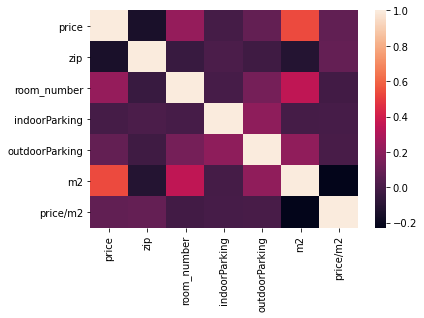

In [36]:
# Calculate correlations
corr = df.corr()
print (corr)

# Heatmap
sns.heatmap(corr)